<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana6/Integracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [83]:
f = lambda x: np.sin(x)
x = np.linspace(-0*np.pi,np.pi,40)
y = f(x)

/tmp/ipython-input-2870579373.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.
  plt.plot(x,y,'.-',marker='*',color='k')


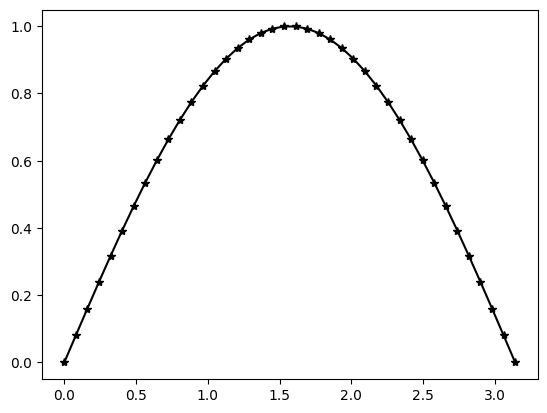

In [84]:
plt.plot(x,y,'.-',marker='*',color='k')

In [85]:
N = 4 # Controlamos el numero de trapecios
x1 = np.linspace(-0*np.pi, 1*np.pi, N+1)
y1 = f(x1)
yp = np.interp(x1,x1,y1)

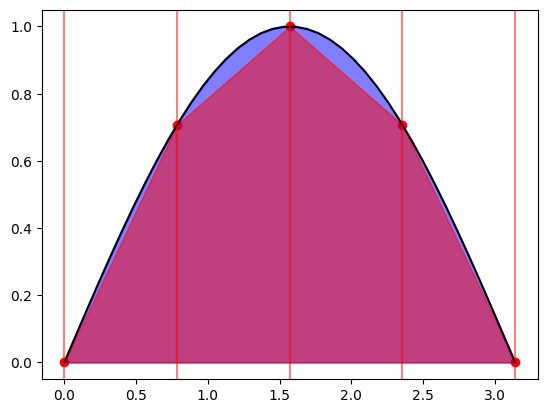

In [86]:
plt.plot(x,y,color='k')
plt.scatter(x1,yp,color='r')
plt.fill_between(x,y,color='b',alpha=0.5)
plt.fill_between(x1,y1,color='r',alpha=0.5)
for l in x1:
  plt.axvline(x=l,color='r',alpha=0.5)
#plt.yscale('log')

In [87]:
class Integrator:

  def __init__(self, x, f):
     # La cuadratura requiere el soport

     self.x = x
     self.h = self.x[1] - self.x[0]
     self.y = f(self.x)


In [88]:
# Definimos una clase hija
class Trapezoid(Integrator):
  def __init__(self, x, f):
    Integrator.__init__(self, x, f)

  def GetIntegral(self):

    self.Integral = 0
    self.Integral += 0.5*(self.y[0]+self.y[-1])
    self.Integral += np.sum(self.y[1:-1])
    self.Integral *= self.h


    return self.Integral

In [89]:
Integrador1 = Trapezoid(x1,f)
Integrador1.GetIntegral()

np.float64(1.8961188979370398)

In [90]:
class Simpson(Integrator):
  def __init__(self, x, f):
    Integrator.__init__(self, x, f)

  def GetIntegral(self):

    self.Integral = 0
    self.Integral += self.y[0]
    self.Integral += 4*np.sum(self.y[1:-1:2])
    self.Integral += 2*np.sum(self.y[2:-2:2])
    self.Integral += self.y[-1]
    self.Integral *= self.h/3

    return self.Integral

In [91]:
Integrador2 = Simpson(x1,f)
Integrador2.GetIntegral()

np.float64(2.0045597549844207)

In [92]:
integrate.trapezoid(f(x1),x1)

np.float64(1.8961188979370398)

In [93]:
integrate.simpson(f(x1),x=x1)

np.float64(2.0045597549844207)

In [94]:
def fourier(x,N):

  y = 0.

  for n in range(1,N):
    bn = 2*(1-np.cos(n*np.pi))/(np.pi*n)
    y += bn*np.sin(n*x)
  return y


In [106]:
modos = 100

x = np.linspace(-0*np.pi,np.pi,50)
y = fourier(x,modos)

N = 100 # Controlamos el numero de trapecios
x1 = np.linspace(-0*np.pi, 1*np.pi, N+1)


y1 = fourier(x1,modos)
yp = np.interp(x1,x1,y1)

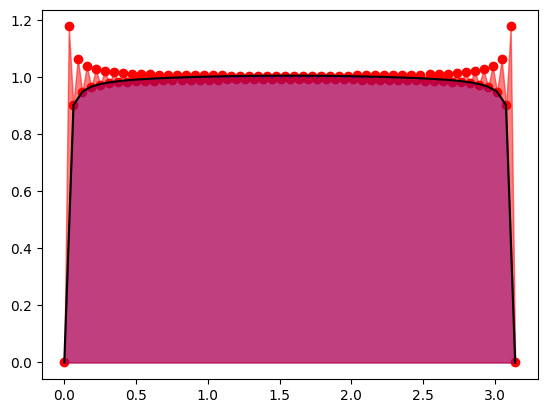

In [107]:
plt.plot(x,y,color='k')
plt.scatter(x1,yp,color='r')
plt.fill_between(x,y,color='b',alpha=0.5)
plt.fill_between(x1,y1,color='r',alpha=0.5)
#for l in x1:
#  plt.axvline(x=l,color='r',alpha=0.5)
#plt.yscale('log')

In [108]:
integrate.simpson(fourier(x1,modos),x=x1)

np.float64(3.1476221679821053)